  # Functional Programming in python

# Lecture 3

## Functional Programming Concepts
* What is Functional Programming?
* Pure Functions and Referential Transparency
* Data Immutability IN, Side-Effects OUT
* What is a Variable?
* Expressing Iteration as Recursion
* Functions as First Class Objects
* Lambda Expressions / Anonymous Functions
* The Concept of Closure
* High-Order Functions
* Lazy Evaluation and Python Generators
* Currying
* Pipelines

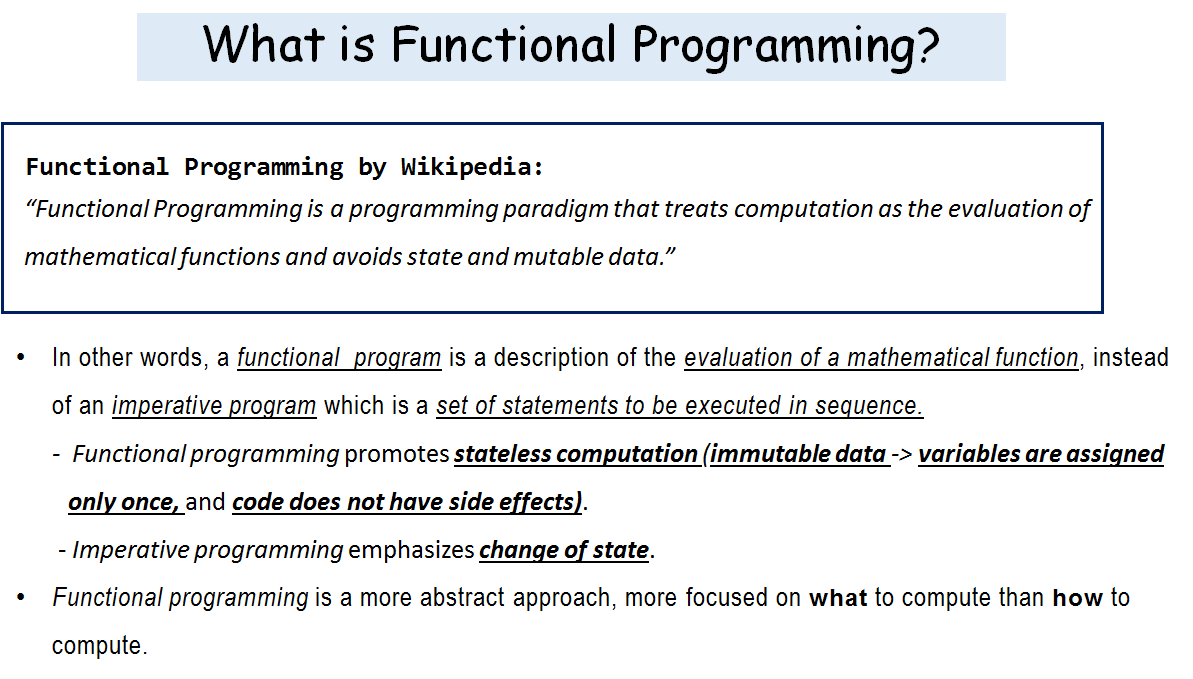

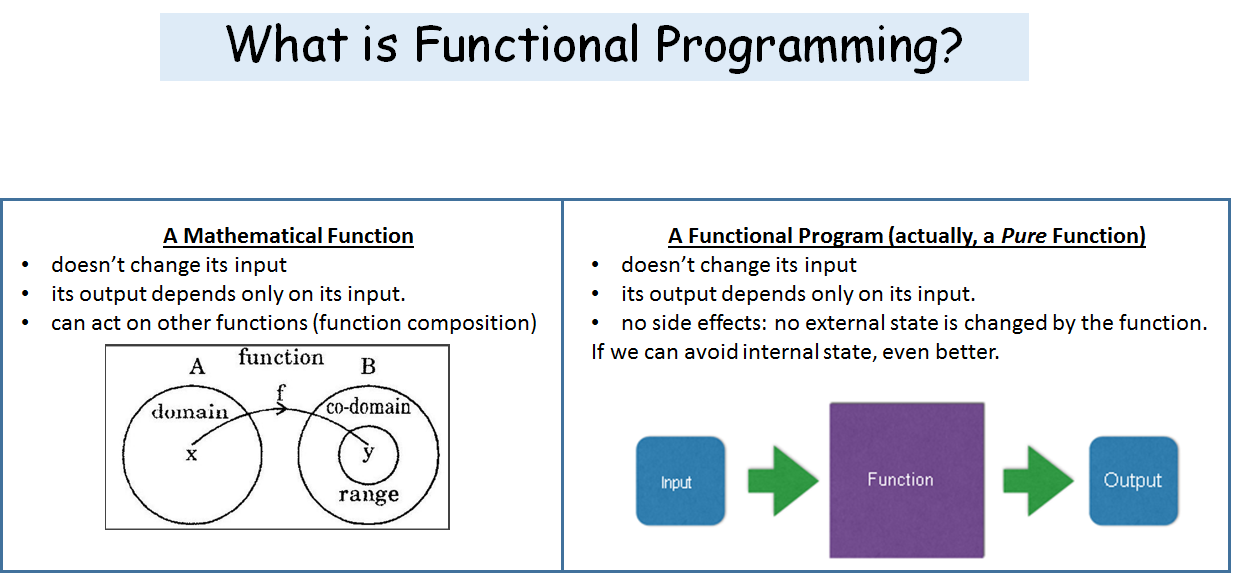

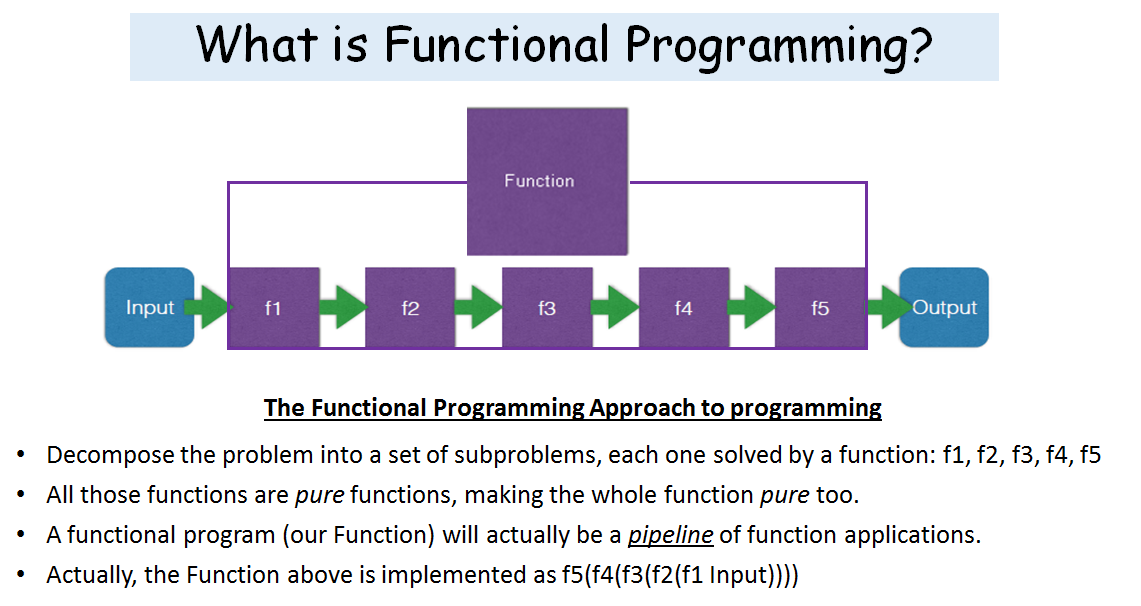

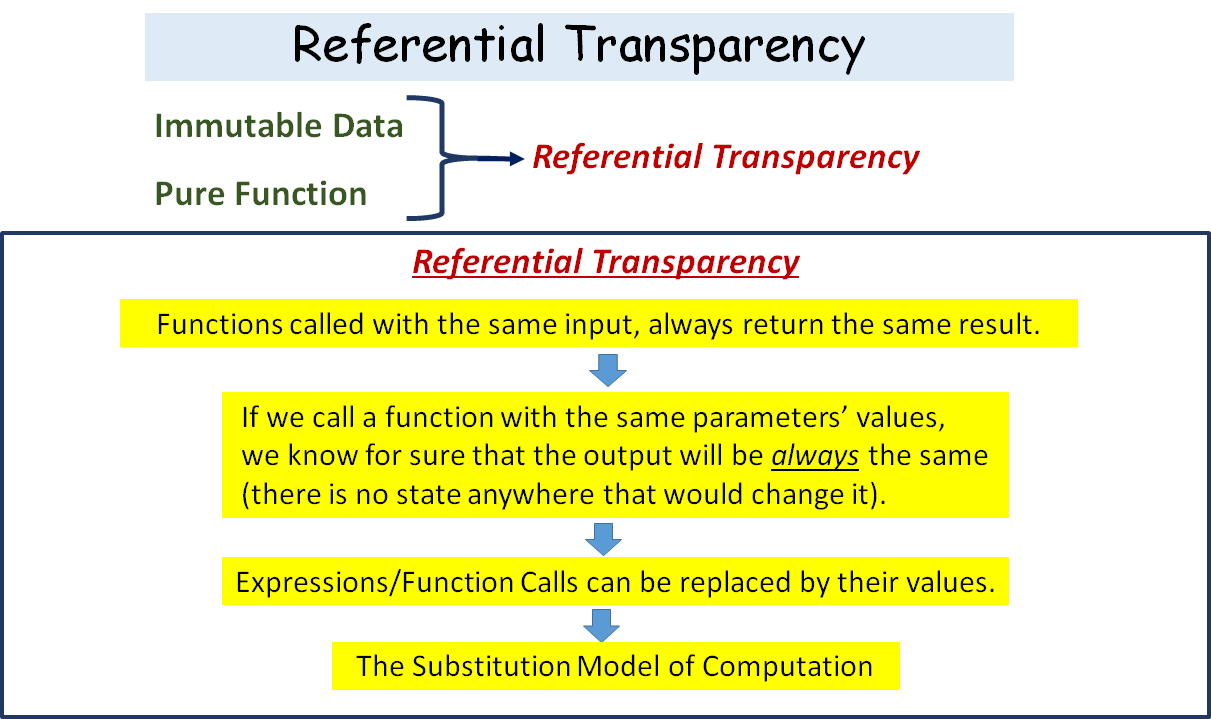